# Importing Necessary Modules

In [ ]:
from utils import Utils
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
utils = Utils()

In [ ]:
data = utils.read_data("/content/drive/My Drive/MIDAS-IIITD-Task-2021/Task3/dataset.tsv", 
                       sep="\t", 
                       usecols=['uniq_id', 'product_name', 'product_category_tree', 'description'])
data

,uniq_id,product_name,product_category_tree,description
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...
...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996,71ac419198359d37b8fe5e3fffdfee09,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997,93e9d343837400ce0d7980874ece471c,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...
19998,669e79b8fa5d9ae020841c0c97d5e935,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...


In [ ]:
data = utils.generate_label(data, top=25)
data.label.value_counts()

Clothing                             6198
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       700
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             35
Gaming                                 35
Pet Supplies                      

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

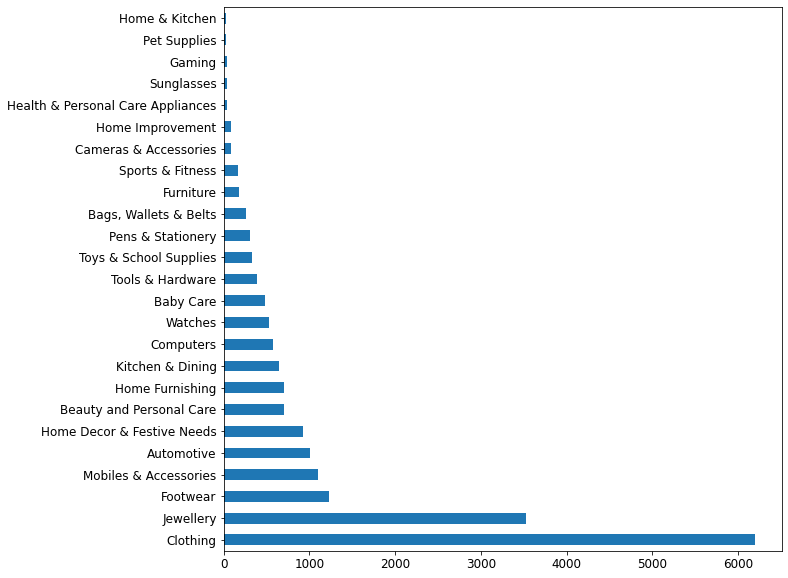

In [ ]:
plt.figure(figsize=(10,10))
data['label'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [ ]:
x_train, x_test, y_train, y_test = utils.prepare_data(data, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(13733,)
(13733,)
(5886,)
(5886,)


In [ ]:
# Prepare text data features

xtrain_count, xvalid_count = utils.count_vectorize(x_train, 
                                                   x_test,
                                                   analyzer='word', 
                                                   token_pattern=r'\w{1,}', 
                                                   max_features=10000, 
                                                   ngram_range=(1,1))

xtrain_count_bi, xvalid_count_bi = utils.count_vectorize(x_train, 
                                                         x_test,
                                                         analyzer='word', 
                                                         token_pattern=r'\w{1,}', 
                                                         max_features=10000, 
                                                         ngram_range=(1,2))

xtrain_count_ngram, xvalid_count_ngram = utils.count_vectorize(x_train, 
                                                               x_test,
                                                               analyzer='word', 
                                                               token_pattern=r'\w{1,}', 
                                                               max_features=10000, 
                                                               ngram_range=(1,3))


xtrain_tfidf, xvalid_tfidf = utils.tf_idf_vectorize(x_train, 
                                                    x_test, 
                                                    analyzer='word', 
                                                    token_pattern=r'\w{1,}', 
                                                    max_features=10000, 
                                                    ngram_range=(1,1))


xtrain_tfidf_bi, xvalid_tfidf_bi = utils.tf_idf_vectorize(x_train, 
                                                          x_test, 
                                                          analyzer='word', 
                                                          token_pattern=r'\w{1,}', 
                                                          max_features=10000, 
                                                          ngram_range=(1,2))


xtrain_tfidf_ngram, xvalid_tfidf_ngram = utils.tf_idf_vectorize(x_train, 
                                                                x_test,
                                                                analyzer='word', 
                                                                token_pattern=r'\w{1,}', 
                                                                max_features=10000, 
                                                                ngram_range=(1,3))

xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars = utils.tf_idf_vectorize(x_train, 
                                                                            x_test,
                                                                            analyzer='char', 
                                                                            token_pattern=r'\w{1,}', 
                                                                            max_features=10000, 
                                                                            ngram_range=(2,3))
print("\nPrepared features for Input data")


Prepared features for Input data


In [ ]:
print("\n ----------------------------------- Evaluation on Multinomial Naive Bayes -----------------------------------n\n")
# Naive Bayes on Count Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_count, xvalid_count, y_train, y_test)
print("Naive Bayes, Count Vectors: ", accuracy)

# Naive Bayes on bigram Count Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_count_bi, xvalid_count_bi, y_train, y_test)
print("\nNaive Bayes, bigram Count Vectors: ", accuracy)

# Naive Bayes on ngram Count Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_count_ngram, xvalid_count_ngram, y_train, y_test)
print("\nNaive Bayes, ngram Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_tfidf, xvalid_tfidf, y_train, y_test)
print("\nNaive Bayes, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Word Level bigram TF IDF Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_tfidf_bi, xvalid_tfidf_bi, y_train, y_test)
print("\nNaive Bayes, WordLevel bigram TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, xvalid_tfidf_ngram, y_train, y_test)
print("\nNaive Bayes, WordLevel ngram TF-IDF: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars, y_train, y_test)
print("\nNaive Bayes, CharLevel ngram TF-IDF: ", accuracy)


 ----------------------------------- Evaluation on Multinomial Naive Bayes -----------------------------------n

Naive Bayes, Count Vectors:  0.928644240570846

Naive Bayes, bigram Count Vectors:  0.9084267753992524

Naive Bayes, ngram Count Vectors:  0.8858307849133538

Naive Bayes, WordLevel TF-IDF:  0.8620455317703024

Naive Bayes, WordLevel bigram TF-IDF:  0.9055385660890248

Naive Bayes, WordLevel ngram TF-IDF:  0.9021406727828746

Naive Bayes, CharLevel ngram TF-IDF:  0.7319062181447502


In [ ]:
print("\n ----------------------------------- Evaluation on Random Forest -----------------------------------n\n")
# Random Forest on Count Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_count, xvalid_count, y_train, y_test)
print("Random Forest, Count Vectors: ", accuracy)

# Random Forest on bigram Count Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_count_bi, xvalid_count_bi, y_train, y_test)
print("\nRandom Forest, bigram Count Vectors: ", accuracy)

# Random Forest on ngram Count Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_count_ngram, xvalid_count_ngram, y_train, y_test)
print("\nRandom Forest, ngram Count Vectors: ", accuracy)

# Random Forest on Word Level TF IDF Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_tfidf, xvalid_tfidf, y_train, y_test)
print("\nRandom Forest, WordLevel TF-IDF: ", accuracy)

# Random Forest on Word Level bigram TF IDF Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_tfidf_bi, xvalid_tfidf_bi, y_train, y_test)
print("\nRandom Forest, WordLevel bigram TF-IDF: ", accuracy)

# Random Forest on Ngram Level TF IDF Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_tfidf_ngram, xvalid_tfidf_ngram, y_train, y_test)
print("\nNRandom Forest, WordLevel ngram TF-IDF: ", accuracy)

# Random Forest on Character Level TF IDF Vectors
accuracy = utils.train_ml_model(ensemble.RandomForestClassifier(n_estimators=100), xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars, y_train, y_test)
print("\nRandom Forest, CharLevel ngram TF-IDF: ", accuracy)


 ----------------------------------- Evaluation on Random Forest -----------------------------------n

Random Forest, Count Vectors:  0.9655113829425757

Random Forest, bigram Count Vectors:  0.971967380224261

Random Forest, ngram Count Vectors:  0.971967380224261

Random Forest, WordLevel TF-IDF:  0.9575263336731227

Random Forest, WordLevel bigram TF-IDF:  0.9624532789670405

NRandom Forest, WordLevel ngram TF-IDF:  0.9605844376486579

Random Forest, CharLevel ngram TF-IDF:  0.9459734964322121


In [ ]:
print("\n ----------------------------------- Evaluation on Linear SVC -----------------------------------n\n")
# LinearSVC on Count Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_count, xvalid_count, y_train, y_test)
print("LinearSVC, Count Vectors: ", accuracy)

# LinearSVC on bigram Count Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_count_bi, xvalid_count_bi, y_train, y_test)
print("\nLinearSVC, bigram Count Vectors: ", accuracy)

# LinearSVC on ngram Count Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=20000), xtrain_count_ngram, xvalid_count_ngram, y_train, y_test)
print("\nLinearSVC, ngram Count Vectors: ", accuracy)

# LinearSVC on Word Level TF IDF Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_tfidf, xvalid_tfidf, y_train, y_test)
print("\nLinearSVC, WordLevel TF-IDF: ", accuracy)

# LinearSVC on Word Level bigram TF IDF Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_tfidf_bi, xvalid_tfidf_bi, y_train, y_test)
print("\nLinearSVC, WordLevel bigram TF-IDF: ", accuracy)

# LinearSVC on Ngram Level TF IDF Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_tfidf_ngram, xvalid_tfidf_ngram, y_train, y_test)
print("\nLinearSVC, WordLevel ngram TF-IDF: ", accuracy)

# LinearSVC on Character Level TF IDF Vectors
accuracy = utils.train_ml_model(LinearSVC(max_iter=15000), xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars, y_train, y_test)
print("\nLinearSVC, CharLevel ngram TF-IDF: ", accuracy)


 ----------------------------------- Evaluation on Linear SVC -----------------------------------n

LinearSVC, Count Vectors:  0.9717974855589534

LinearSVC, bigram Count Vectors:  0.9685694869181107


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



LinearSVC, ngram Count Vectors:  0.9682296975874958

LinearSVC, WordLevel TF-IDF:  0.9789330615018689

NLinearSVC, WordLevel bigram TF-IDF:  0.9780835881753313

LinearSVC, WordLevel ngram TF-IDF:  0.9775739041794088

LinearSVC, CharLevel ngram TF-IDF:  0.9775739041794088
